In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa-220120-145526.txt","rb") as fp:
    train_data=pickle.load(fp)

In [9]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [10]:
with open("test_qa-220120-145430.txt","rb") as fp:
    test_data=pickle.load(fp)

In [11]:
test_data


[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [12]:
len(test_data)

1000

In [13]:
len(train_data)

10000

In [14]:
#set up vocabulary
vocab=set()

In [15]:
all_data=test_data + train_data

In [16]:
len(all_data)

11000

In [17]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))
    

In [18]:
vocab.add('yes')

In [19]:
vocab.add('no')

In [20]:
len(vocab)

37

In [21]:
vocab_len=len(vocab)+1

In [22]:
for data in all_data:
    print(data)
    print("\n")

(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'garden', '?'], 'yes')


(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'travelled', 'to'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
max_story_len=max([len(data[0]) for data in all_data])

In [24]:
max_question_len=max([len(data[1]) for data in all_data])

In [25]:
max_question_len

6

In [26]:
#vectorize
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [27]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.word_index


{'to': 1,
 'back': 2,
 'milk': 3,
 'hallway': 4,
 'up': 5,
 'no': 6,
 'is': 7,
 'yes': 8,
 'travelled': 9,
 '.': 10,
 'apple': 11,
 'daniel': 12,
 'got': 13,
 'garden': 14,
 'put': 15,
 'office': 16,
 'discarded': 17,
 'bathroom': 18,
 '?': 19,
 'grabbed': 20,
 'there': 21,
 'the': 22,
 'dropped': 23,
 'went': 24,
 'kitchen': 25,
 'football': 26,
 'sandra': 27,
 'journeyed': 28,
 'john': 29,
 'took': 30,
 'mary': 31,
 'down': 32,
 'in': 33,
 'moved': 34,
 'left': 35,
 'picked': 36,
 'bedroom': 37}

In [30]:
train_story_text=[]
train_question_text=[]
train_answers=[]
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [32]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [34]:
len(train_story_text)

10000

In [35]:
len(train_question_text)

10000

In [41]:
def vectorize_stories(data, word_index=tokenizer.word_index,
                      max_story_len=max_story_len, max_question_len=max_question_len):
    X=[]#stories
    Xq=[]#query/question
    Y=[]#correct answer
    for story,query,answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X,maxlen=max_story_len),
          pad_sequences(Xq,maxlen=max_question_len),
          np.array(Y))

In [42]:
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [43]:
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [44]:
inputs_train

array([[ 0,  0,  0, ..., 22, 37, 10],
       [ 0,  0,  0, ..., 22,  4, 10],
       [ 0,  0,  0, ..., 22, 18, 10],
       ...,
       [ 0,  0,  0, ..., 22, 37, 10],
       [ 0,  0,  0, ...,  3, 21, 10],
       [ 0,  0,  0, ..., 11, 21, 10]])

In [45]:
queries_test

array([[ 7, 29, 33, 22, 25, 19],
       [ 7, 29, 33, 22, 25, 19],
       [ 7, 29, 33, 22, 14, 19],
       ...,
       [ 7, 31, 33, 22, 37, 19],
       [ 7, 27, 33, 22, 14, 19],
       [ 7, 31, 33, 22, 14, 19]])

In [46]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
tokenizer.word_index['yes']


8

In [48]:
tokenizer.word_index['no']

6

In [51]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input ,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM


In [53]:
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

In [55]:
#input encoder m
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [60]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [61]:
#question encoder
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [62]:
#encode the sequences
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [63]:
match=dot([input_encoded_m,question_encoded],axes=(2,2)) 
match=Activation('softmax')(match)

In [64]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [65]:
#concatenate
answer=concatenate([response,question_encoded])

In [66]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [67]:
answer=LSTM(32)(answer)

In [68]:
answer=Dropout(0.5)(answer)

In [69]:
answer=Dense(vocab_len)(answer)
answer=Activation('softmax')(answer)

In [71]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_2[0][0]']                
                                                                                                  
 sequential_4 (Sequential)      (None, 6, 64)        2432        ['input_3[0][0]']                
                                                                                              

In [74]:
history=model.fit([inputs_train,queries_train],answers_train,
                 batch_size=32,epochs=20,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/20
313/313 [==============================] - 16s 30ms/step - loss: 0.8492 - accuracy: 0.5063 - val_loss: 0.7039 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 8s 26ms/step - loss: 0.7003 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 9s 29ms/step - loss: 0.6949 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6950 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6946 - accuracy: 0.5041 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 9s 27ms/step - loss: 0.6949 - accuracy: 0.5043 - val_loss: 0.6940 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6947 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.503

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


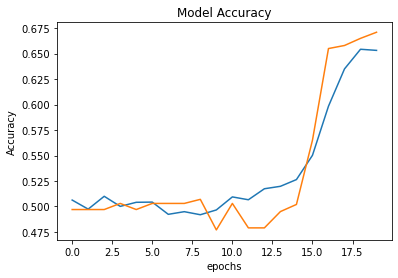

In [79]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

plt.show()


In [80]:
#save the model
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [82]:
#evaluation of test_data
model.load_weights("chatbot_model")

In [84]:
pred_results=model.predict(([inputs_test,queries_test]))

In [85]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [93]:
story=' '.join(word for word in test_data[23][0])



In [94]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [95]:
query=' '.join(word for word in test_data[23][1])

In [96]:
query

'Is Sandra in the bedroom ?'

In [97]:
test_data[23][2]

'no'

In [98]:
val_max=np.argmax(pred_results[23])
for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[23][val_max])

Predicted Answer is  no
Probability of certainity 0.7683105


In [99]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [113]:
story="John dropped milk . Mary discarded apple in kitchen . Daniel went to office . "
story.split()

['John',
 'dropped',
 'milk',
 '.',
 'Mary',
 'discarded',
 'apple',
 'in',
 'kitchen',
 '.',
 'Daniel',
 'went',
 'to',
 'office',
 '.']

In [119]:
my_question="Is Daniel in the office ?"
my_question.split()

['Is', 'Daniel', 'in', 'the', 'office', '?']

In [120]:
mydata=[(story.split(),my_question.split(),'yes')]

In [121]:
my_story,my_ques,my_ans=vectorize_stories(mydata)

In [122]:
pred_results=model.predict(([my_story,my_ques]))

In [123]:
val_max=np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("Predicted Answer is ",k)
print("Probability of certainity",pred_results[0][val_max])

Predicted Answer is  yes
Probability of certainity 0.7032763
